<h3> Third part of the code </h3>

Running the main code required.

Portion of the code involved, including,<br />
- Portion of finishing code that are splited based on year.<br />
- Spliting by training and testing set.<br />
(2010-2013 --> Not being used) (2014-2018 --> Training) (2019-2021 --> Testing)<br />
- Histogram of each set.<br />
- Chi Square analysis of each set.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
import ydata_profiling as pp  
from ydata_profiling import ProfileReport 
from scipy.stats import chi2_contingency

import warnings
import os

warnings.filterwarnings('ignore')

In [4]:
# If the dataset are missing for this components, it will give a error.

# df_AvgAnnHrsWrk # Average annual hours worked

df_indicators = ['df_AvgAnnHrsWrk_2013.csv', 'df_AvgAnnHrsWrk_2016.csv', 'df_AvgAnnHrsWrk_2019.csv',
                 'df_AvgAnnWages_2013.csv', 'df_AvgAnnWages_2016.csv', 'df_AvgAnnWages_2019.csv',
                 'df_AvgHrsWages_2013.csv', 'df_AvgHrsWages_2016.csv', 'df_AvgHrsWages_2019.csv',
                 'df_AvgWeekHrsWrked_2013.csv', 'df_AvgWeekHrsWrked_2016.csv', 'df_AvgWeekHrsWrked_2019.csv',
                 'df_Hrs_Wrked_2013.csv', 'df_Hrs_Wrked_2016.csv', 'df_Hrs_Wrked_2019.csv',
                 'df_NumOfJob_2013.csv', 'df_NumOfJob_2016.csv', 'df_NumOfJob_2019.csv',
                 'df_WagesAndSalaries_2013.csv', 'df_WagesAndSalaries_2016.csv', 'df_WagesAndSalaries_2019.csv'
                 ]

df_list = []

for x in df_indicators:
    if os.path.isfile(x):
        df_sorted_na = pd.read_csv(x)

        print(df_sorted_na.info())
        print(df_sorted_na.head(10))

        df_list.append(df_sorted_na)
    else:
        print("Run main code first before running this.")
        break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   REF_DATE         3672 non-null   int64  
 1   DGUID            3672 non-null   object 
 2   GEO              3672 non-null   object 
 3   Sector           3672 non-null   object 
 4   Characteristics  3672 non-null   object 
 5   Indicators       3672 non-null   object 
 6   UOM              3672 non-null   object 
 7   SCALAR_FACTOR    3672 non-null   object 
 8   VALUE            3672 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 258.3+ KB
None
   REF_DATE           DGUID     GEO                         Sector  \
0      2013  2016A000011124  Canada  Total non-profit institutions   
1      2013  2016A000011124  Canada  Total non-profit institutions   
2      2013  2016A000011124  Canada  Total non-profit institutions   
3      2013  2016A000011124  Canada  To

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   REF_DATE         3672 non-null   int64  
 1   DGUID            3672 non-null   object 
 2   GEO              3672 non-null   object 
 3   Sector           3672 non-null   object 
 4   Characteristics  3672 non-null   object 
 5   Indicators       3672 non-null   object 
 6   UOM              3672 non-null   object 
 7   SCALAR_FACTOR    3672 non-null   object 
 8   VALUE            3672 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 258.3+ KB
None
   REF_DATE           DGUID     GEO                         Sector  \
0      2019  2016A000011124  Canada  Total non-profit institutions   
1      2019  2016A000011124  Canada  Total non-profit institutions   
2      2019  2016A000011124  Canada  Total non-profit institutions   
3      2019  2016A000011124  Canada  To

In [5]:
# If the code cannot run, it will give a error.

# df_AvgAnnHrsWrk_2013
df_AvgAnnHrsWrk_2013 = df_list[0]
df_AvgAnnHrsWrk_2016 = df_list[1]
df_AvgAnnHrsWrk_2019 = df_list[2]

# df_AvgAnnWages # Average annual wages and salaries
df_AvgAnnWages_2013 = df_list[3]
df_AvgAnnWages_2016 = df_list[4]
df_AvgAnnWages_2019 = df_list[5]

# df_AvgHrsWages # Average hourly wage
df_AvgHrsWages_2013 = df_list[6]
df_AvgHrsWages_2016 = df_list[7]
df_AvgHrsWages_2019 = df_list[8]

# df_AvgWeekHrsWrked # Average weekly hours worked
df_AvgWeekHrsWrked_2013 = df_list[9]
df_AvgWeekHrsWrked_2016 = df_list[10]
df_AvgWeekHrsWrked_2019 = df_list[11]

# df_Hrs_Wrked # Hours Worked
df_Hrs_Wrked_2013 = df_list[12]
df_Hrs_Wrked_2016 = df_list[13]
df_Hrs_Wrked_2019 = df_list[14]

# df_NumOfJob # Number of jobs
df_NumOfJob_2013 = df_list[15]
df_NumOfJob_2016 = df_list[16]
df_NumOfJob_2019 = df_list[17]

# df_WagesAndSalaries # Wages and Salaries
df_WagesAndSalaries_2013 = df_list[18]
df_WagesAndSalaries_2016 = df_list[19]
df_WagesAndSalaries_2019 = df_list[20]

Training dataset going to be after 2013 to before 2018.<br />
Testing dataset going to be after 2019.<br />
Analysis is still finishing year of 2013 to 2018 though.<br />
I have decided not to use train_test_split method because I have divided dataset by the year.<br />
Instead I have divide it manually.

In [6]:
# https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

# This will be used if I were to use train_test_split given.

# from sklearn.model_selection import train_test_split

# train, test = train_test_split(dataset, ...)
# x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)    

In [7]:
# Average annual hours worked
# Use 2013-2015, 2016-2018 as training set
# Use 2019-2021 as testing set

frames = [df_AvgAnnHrsWrk_2013, df_AvgAnnHrsWrk_2016]
training_df_AvgAnnHrsWrk = pd.concat(frames)
testing_df_AvgAnnHrsWrk = df_AvgAnnHrsWrk_2019.copy()

grouped = training_df_AvgAnnHrsWrk.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

grouped = testing_df_AvgAnnHrsWrk.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

                sum  size
REF_DATE                 
2013      1906851.0  1224
2014      1898034.0  1224
2015      1907286.0  1224
2016      1899738.0  1224
2017      1881389.0  1224
2018      1894227.0  1224
                sum  size
REF_DATE                 
2019      1894126.0  1224
2020      1873544.0  1224
2021      1901826.0  1224


In [8]:
# Average annual wages and salaries

frames = [df_AvgAnnWages_2013, df_AvgAnnWages_2016]
training_df_AvgAnnWages = pd.concat(frames)
testing_df_AvgAnnWages = df_AvgAnnHrsWrk_2019.copy()

grouped = training_df_AvgAnnWages.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

grouped = testing_df_AvgAnnWages.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

                 sum  size
REF_DATE                  
2013      50598135.0  1224
2014      51805889.0  1224
2015      52715143.0  1224
2016      53166285.0  1224
2017      53965359.0  1224
2018      55525920.0  1224
                sum  size
REF_DATE                 
2019      1894126.0  1224
2020      1873544.0  1224
2021      1901826.0  1224


In [9]:
# Average hourly wage

frames = [df_AvgHrsWages_2013, df_AvgHrsWages_2016]
training_df_AvgHrsWages = pd.concat(frames)
testing_df_AvgHrsWages = df_AvgHrsWages_2019.copy()

grouped = training_df_AvgHrsWages.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

grouped = testing_df_AvgHrsWages.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

               sum  size
REF_DATE                
2013      31932.19  1224
2014      32916.44  1224
2015      33362.79  1224
2016      33756.84  1224
2017      34571.41  1224
2018      35356.16  1224
               sum  size
REF_DATE                
2019      36293.34  1224
2020      38980.38  1224
2021      38514.73  1224


In [10]:
# Average weekly hours worked

frames = [df_AvgWeekHrsWrked_2013, df_AvgWeekHrsWrked_2016]
training_df_AvgWeekHrsWrked = pd.concat(frames)
testing_df_AvgWeekHrsWrked = df_AvgWeekHrsWrked_2019.copy()

grouped = training_df_AvgWeekHrsWrked.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

grouped = testing_df_AvgWeekHrsWrked.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

              sum  size
REF_DATE               
2013      36671.0  1224
2014      36483.0  1224
2015      36678.0  1224
2016      36541.0  1224
2017      36170.0  1224
2018      36416.0  1224
              sum  size
REF_DATE               
2019      36400.0  1224
2020      36036.0  1224
2021      36555.0  1224


In [11]:
# Hours Worked

frames = [df_Hrs_Wrked_2013, df_Hrs_Wrked_2016]
training_df_Hrs_Wrked = pd.concat(frames)
testing_df_Hrs_Wrked = df_Hrs_Wrked_2019.copy()

grouped = training_df_Hrs_Wrked.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

grouped = testing_df_Hrs_Wrked.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

                  sum  size
REF_DATE                   
2013       98935086.0  1224
2014       99777902.0  1224
2015      101927894.0  1224
2016      103980992.0  1224
2017      103906357.0  1224
2018      106885614.0  1224
                  sum  size
REF_DATE                   
2019      108384508.0  1224
2020      103897606.0  1224
2021      112280627.0  1224


In [12]:
# Number of jobs

frames = [df_NumOfJob_2013, df_NumOfJob_2016]
training_df_NumOfJob = pd.concat(frames)
testing_df_NumOfJob = df_NumOfJob_2019.copy()

grouped = training_df_NumOfJob.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

grouped = testing_df_NumOfJob.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

                 sum  size
REF_DATE                  
2013      63161481.0  1224
2014      63980381.0  1224
2015      65239031.0  1224
2016      66578386.0  1224
2017      66979678.0  1224
2018      68215341.0  1224
                 sum  size
REF_DATE                  
2019      69702012.0  1224
2020      67249987.0  1224
2021      70971515.0  1224


In [13]:
# Wages and Salaries

frames = [df_WagesAndSalaries_2013, df_WagesAndSalaries_2016]
training_df_WagesAndSalaries = pd.concat(frames)
testing_df_WagesAndSalaries = df_WagesAndSalaries_2019.copy()

grouped = training_df_WagesAndSalaries.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

grouped = testing_df_WagesAndSalaries.groupby(['REF_DATE'])
print(grouped['VALUE'].agg([np.sum, np.size]))

                sum  size
REF_DATE                 
2013      2746199.0  1224
2014      2844225.0  1224
2015      2965770.0  1224
2016      3043217.0  1224
2017      3118809.0  1224
2018      3263527.0  1224
                sum  size
REF_DATE                 
2019      3437480.0  1224
2020      3532888.0  1224
2021      3764252.0  1224


The next step is to display the output

Final output for Average annual hours worked

In [14]:
class Target_To_Analysis:

    def __init__(self, df, pd, np, pp, sns, year):
      self.dfa_Target_To_Analysis = df
      self.year = year
      self.pd = pd
      self.np = np
      self.pp = pp
      self.sns = sns
 
    # create a function
    def print_result(self):
      n = 0
      for df_Target_To_Analysis in self.dfa_Target_To_Analysis:
            grouped = df_Target_To_Analysis.groupby(['Characteristics'])
            print(self.year[n])
            print(grouped['VALUE'].agg([np.sum, np.mean, np.min, np.median, np.max, np.size]))
            print("Overall,")
            print("Sum : ",np.sum(df_Target_To_Analysis['VALUE']))
            print("Mean : ",np.mean(df_Target_To_Analysis['VALUE']))
            print("Min/median/max :",np.min(df_Target_To_Analysis['VALUE']),"/",
                  np.median(df_Target_To_Analysis['VALUE']),"/",
                  np.max(df_Target_To_Analysis['VALUE']))
            print("Standard Deviation : ",np.std(df_Target_To_Analysis['VALUE']))
            print("Skewnewss : ",df_Target_To_Analysis['VALUE'].skew())
            print("Total size : ",len(df_Target_To_Analysis.index))
            print()
            n = n + 1
    
    def print_histogram(self, n):
      sns.displot(data=self.dfa_Target_To_Analysis[int(n)], x="VALUE", kind="hist", bins = 100, aspect = 1.5)
      plt.show()

In [15]:
dfa_Target_To_Analysis = [training_df_AvgAnnHrsWrk, testing_df_AvgAnnHrsWrk]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set','testing set'])
dfa_Target_To_Analysis.print_result()

training set
                                        sum         mean    amin  median  \
Characteristics                                                            
15 to 24 years                     348240.0   906.875000   462.0   916.0   
25 to 34 years                     677949.0  1614.164286  1236.0  1604.5   
35 to 44 years                     750842.0  1787.719048  1436.0  1760.5   
45 to 54 years                     773872.0  1842.552381  1523.0  1829.0   
55 to 64 years                     703129.0  1674.116667  1390.0  1679.0   
65 years old and over              413498.0  1076.817708   701.0  1073.5   
College diploma                    699642.0  1665.814286  1408.0  1647.0   
Female employees                   643890.0  1533.071429  1231.0  1538.0   
High school diploma and less       554052.0  1319.171429  1065.0  1317.0   
Immigrant employees                648482.0  1637.580808  1333.0  1600.0   
Indigenous identity employees      582295.0  1470.441919  1057.0  1492.0   

Histogram for training dataset


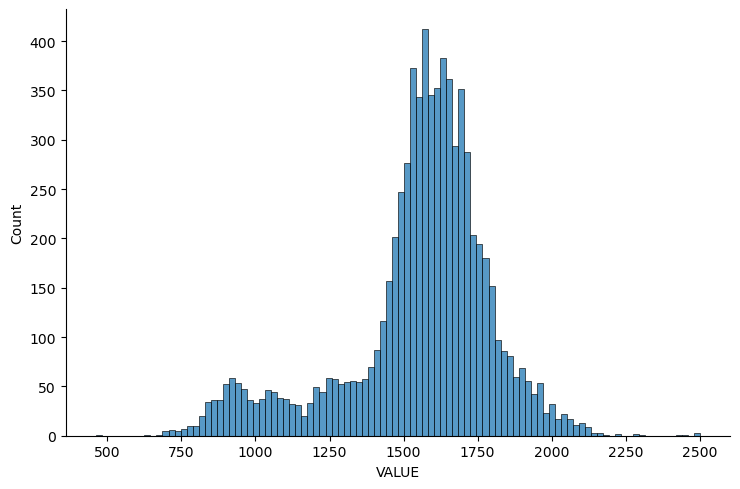

Histgram for testing dataset


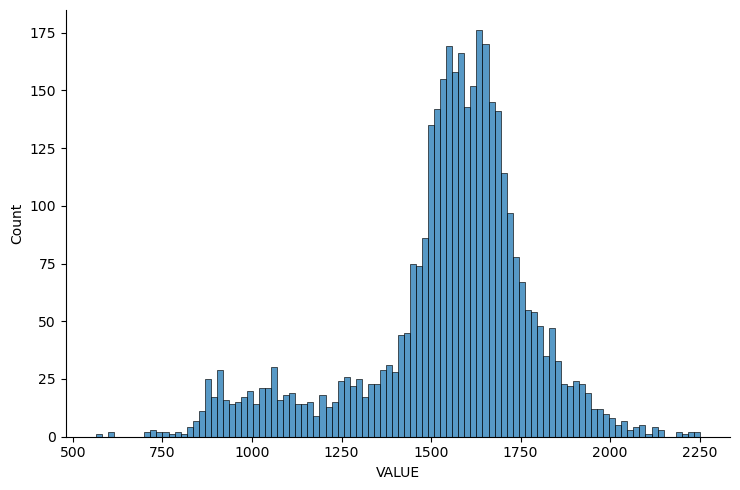

In [16]:
print("Histogram for training dataset") # testing dataset")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset")
dfa_Target_To_Analysis.print_histogram(1)

Final output for "Average annual wages and salaries"

In [17]:
dfa_Target_To_Analysis = [training_df_AvgAnnWages, testing_df_AvgAnnWages]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set','testing set'])
dfa_Target_To_Analysis.print_result()

training set
                                          sum          mean     amin   median  \
Characteristics                                                                 
15 to 24 years                      5844745.0  15220.690104   8769.0  14305.5   
25 to 34 years                     16279492.0  38760.695238  23433.0  37717.0   
35 to 44 years                     22063695.0  52532.607143  33680.0  51506.0   
45 to 54 years                     23873488.0  56841.638095  30761.0  55972.0   
55 to 64 years                     22698208.0  54043.352381  28716.0  51361.5   
65 years old and over              12199299.0  31769.007812  14168.0  29624.0   
College diploma                    18964213.0  45152.888095  26342.0  42893.0   
Female employees                   17243175.0  41055.178571  23619.0  39648.0   
High school diploma and less       12141489.0  28908.307143  13589.0  27359.0   
Immigrant employees                17912206.0  45232.843434  19120.0  43440.0   
Indigenous iden

Histogram for training dataset


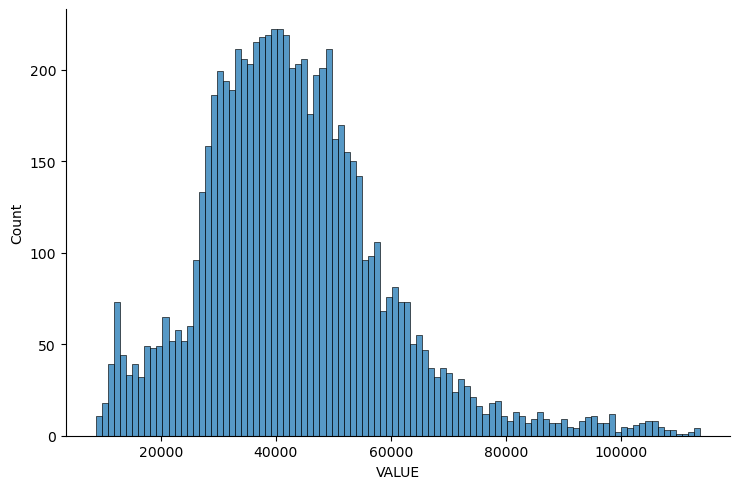

Histgram for testing dataset


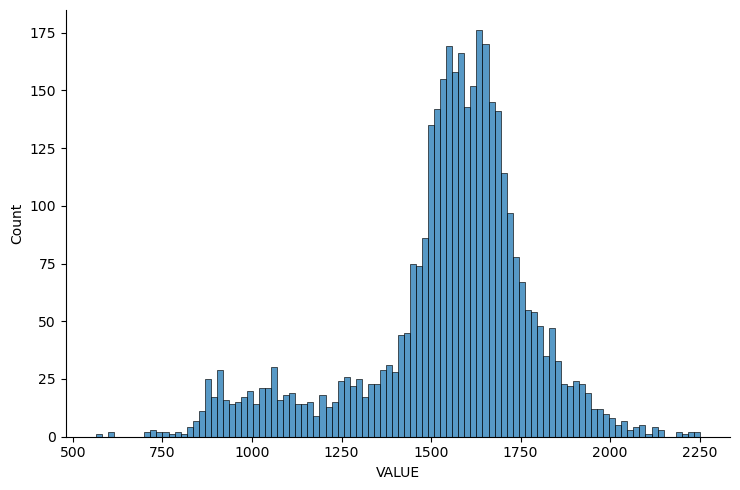

In [18]:
print("Histogram for training dataset") # testing dataset")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset")
dfa_Target_To_Analysis.print_histogram(1)

Final output for "Average hourly wage"

In [19]:
dfa_Target_To_Analysis = [training_df_AvgHrsWages, testing_df_AvgHrsWages]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set','testing set'])
dfa_Target_To_Analysis.print_result()

training set
                                        sum       mean   amin  median   amax  \
Characteristics                                                                
15 to 24 years                      6394.37  16.652005  11.70  15.830  33.72   
25 to 34 years                     10151.74  24.170810  15.07  23.265  47.75   
35 to 44 years                     12429.33  29.593643  17.22  29.065  54.92   
45 to 54 years                     13001.51  30.955976  16.89  30.625  56.39   
55 to 64 years                     13540.12  32.238381  16.73  30.490  63.53   
65 years old and over              11253.83  29.306849  15.90  27.780  69.41   
College diploma                    11423.95  27.199881  15.59  25.745  55.36   
Female employees                   11253.54  26.794143  15.83  25.925  50.72   
High school diploma and less        9141.89  21.766405  12.76  20.985  38.43   
Immigrant employees                10867.07  27.442096  13.35  25.855  57.56   
Indigenous identity employe

Histogram for training dataset


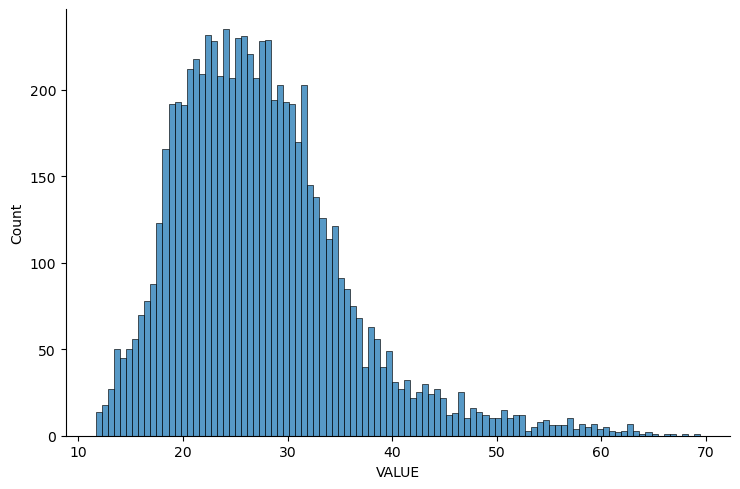

Histgram for testing dataset


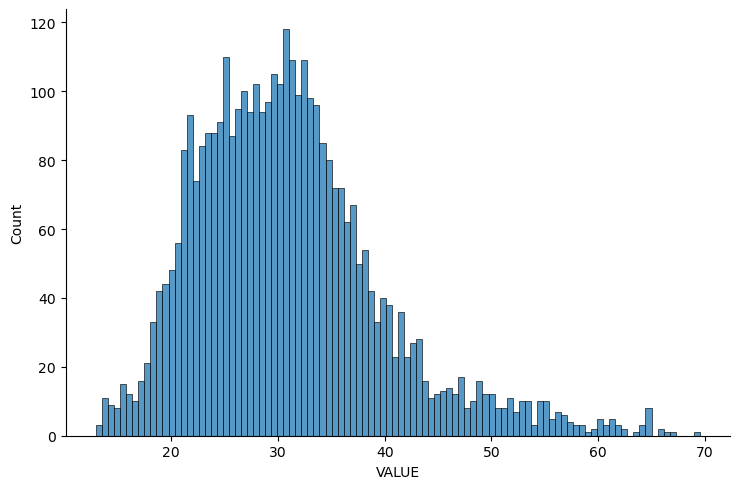

In [20]:
print("Histogram for training dataset") # testing dataset")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset")
dfa_Target_To_Analysis.print_histogram(1)

Final output for "Average weekly hours worked"

In [21]:
dfa_Target_To_Analysis = [training_df_AvgWeekHrsWrked, testing_df_AvgWeekHrsWrked]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set','testing set'])
dfa_Target_To_Analysis.print_result()

training set
                                       sum       mean  amin  median  amax  \
Characteristics                                                             
15 to 24 years                      6701.0  17.450521   9.0    18.0  23.0   
25 to 34 years                     13045.0  31.059524  24.0    31.0  38.0   
35 to 44 years                     14441.0  34.383333  28.0    34.0  42.0   
45 to 54 years                     14869.0  35.402381  29.0    35.0  44.0   
55 to 64 years                     13528.0  32.209524  27.0    32.0  38.0   
65 years old and over               7948.0  20.697917  13.0    21.0  29.0   
College diploma                    13453.0  32.030952  27.0    32.0  39.0   
Female employees                   12380.0  29.476190  24.0    30.0  33.0   
High school diploma and less       10649.0  25.354762  20.0    25.0  32.0   
Immigrant employees                12463.0  31.472222  26.0    31.0  48.0   
Indigenous identity employees      11198.0  28.277778  20.0    

Histogram for training dataset


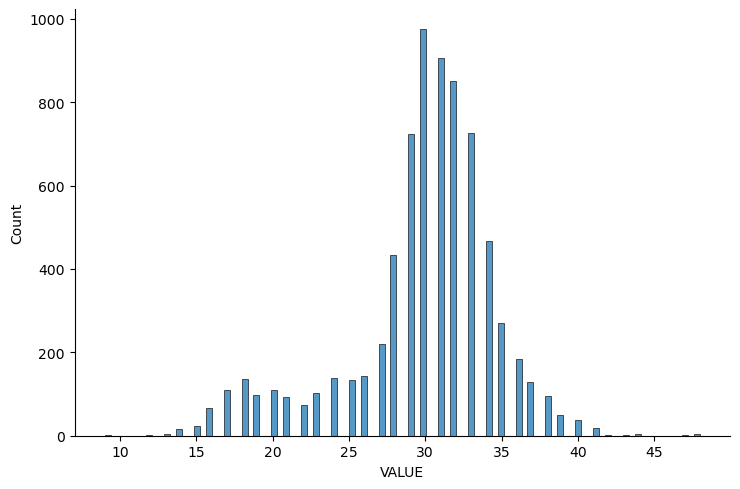

Histgram for testing dataset


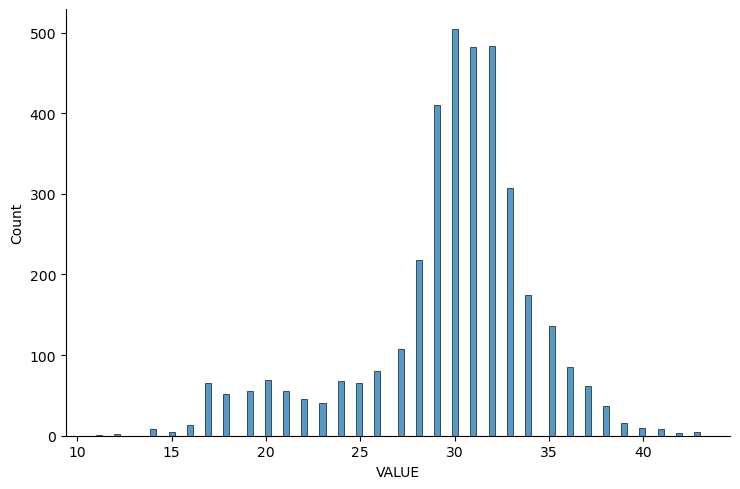

In [22]:
print("Histogram for training dataset") # testing dataset")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset")
dfa_Target_To_Analysis.print_histogram(1)

Final output for "Hours Worked"

In [23]:
dfa_Target_To_Analysis = [training_df_Hrs_Wrked, testing_df_Hrs_Wrked]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set','testing set'])
dfa_Target_To_Analysis.print_result()

training set
                                          sum           mean   amin   median  \
Characteristics                                                                
15 to 24 years                      6319354.0   16456.651042    6.0   4000.0   
25 to 34 years                     21892318.0   52124.566667   32.0   9676.5   
35 to 44 years                     23526930.0   56016.500000   32.0  10443.5   
45 to 54 years                     26229128.0   62450.304762   29.0  10857.5   
55 to 64 years                     20321678.0   48384.947619   20.0   8825.5   
65 years old and over               4298529.0   11194.085938   26.0   2495.5   
College diploma                    27470020.0   65404.809524   30.0  10379.5   
Female employees                   69941334.0  166526.985714   57.0  27674.0   
High school diploma and less       18744590.0   44629.976190   54.0  11567.5   
Immigrant employees                25508532.0   64415.484848   41.0   6476.5   
Indigenous identity employe

Histogram for training dataset


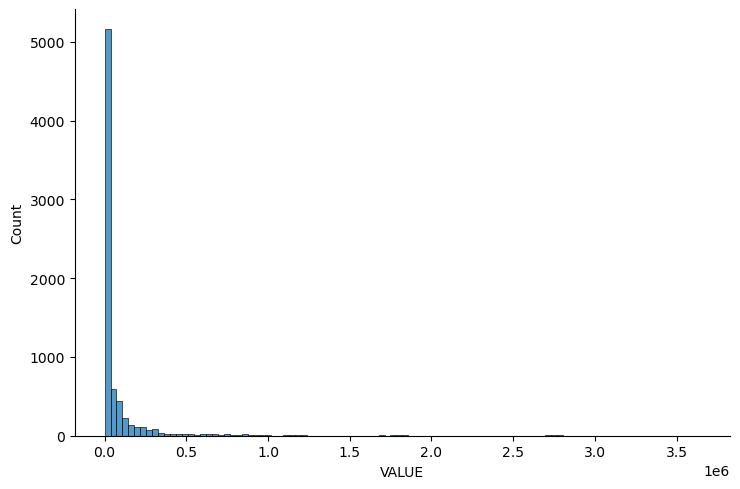

Histgram for testing dataset


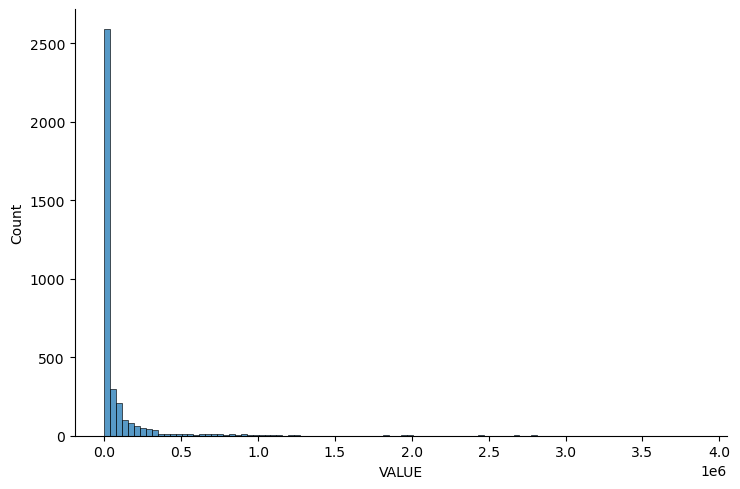

In [24]:
print("Histogram for training dataset") # testing dataset")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset")
dfa_Target_To_Analysis.print_histogram(1)

Final output for "Number of jobs"

In [25]:
dfa_Target_To_Analysis = [training_df_NumOfJob, testing_df_NumOfJob]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set','testing set'])
dfa_Target_To_Analysis.print_result()

training set
                                          sum           mean   amin   median  \
Characteristics                                                                
15 to 24 years                      7043629.0   18342.783854   13.0   4215.0   
25 to 34 years                     13985914.0   33299.795238   17.0   5885.0   
35 to 44 years                     13654580.0   32510.904762   18.0   5906.0   
45 to 54 years                     14554094.0   34652.604762   14.0   5993.0   
55 to 64 years                     12313508.0   29317.876190   11.0   5355.0   
65 years old and over               4150652.0   10808.989583   18.0   2306.5   
College diploma                    17030502.0   40548.814286   16.0   6147.5   
Female employees                   45510332.0  108357.933333   35.0  18345.5   
High school diploma and less       14427614.0   34351.461905   36.0   8041.5   
Immigrant employees                16175470.0   40847.146465   19.0   3842.0   
Indigenous identity employe

Histogram for training dataset


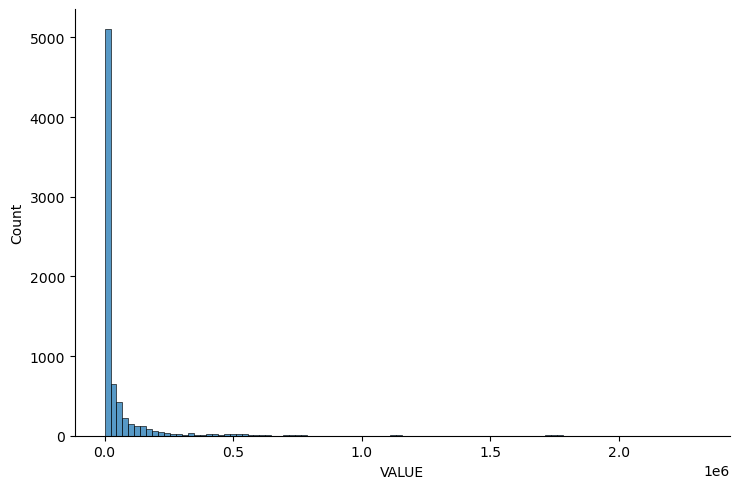

Histgram for testing dataset


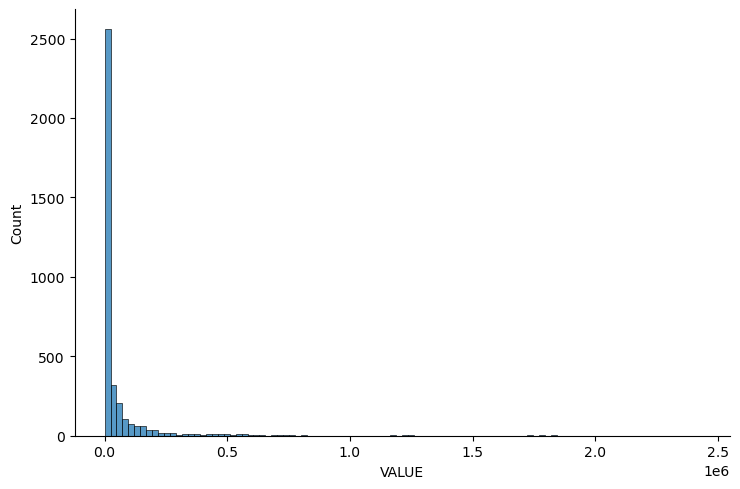

In [26]:
print("Histogram for training dataset") # testing dataset")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset")
dfa_Target_To_Analysis.print_histogram(1)

Final output for "Wages and Salaries"

In [27]:
dfa_Target_To_Analysis = [training_df_WagesAndSalaries, testing_df_WagesAndSalaries]
dfa_Target_To_Analysis = Target_To_Analysis(dfa_Target_To_Analysis, pd, np, pp, sns, ['training set','testing set'])
dfa_Target_To_Analysis.print_result()

training set
                                         sum         mean  amin  median  \
Characteristics                                                           
15 to 24 years                      108973.0   283.783854   0.0    63.0   
25 to 34 years                      538547.0  1282.254762   1.0   211.0   
35 to 44 years                      710804.0  1692.390476   1.0   252.5   
45 to 54 years                      842807.0  2006.683333   1.0   285.5   
55 to 64 years                      657465.0  1565.392857   1.0   228.0   
65 years old and over               138783.0   361.414062   1.0    66.5   
College diploma                     734205.0  1748.107143   1.0   232.5   
Female employees                   1953878.0  4652.090476   2.0   592.5   
High school diploma and less        399426.0   951.014286   2.0   232.0   
Immigrant employees                 749325.0  1892.234848   1.0   172.5   
Indigenous identity employees       104776.0   264.585859   1.0    77.0   
Male employe

Histogram for training dataset


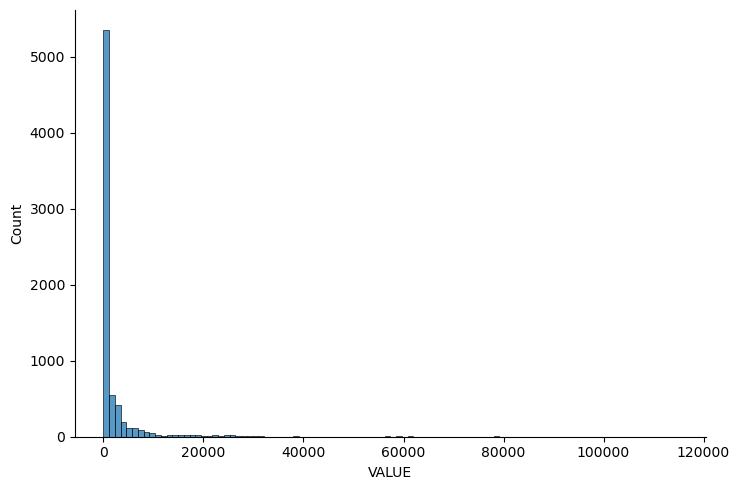

Histgram for testing dataset


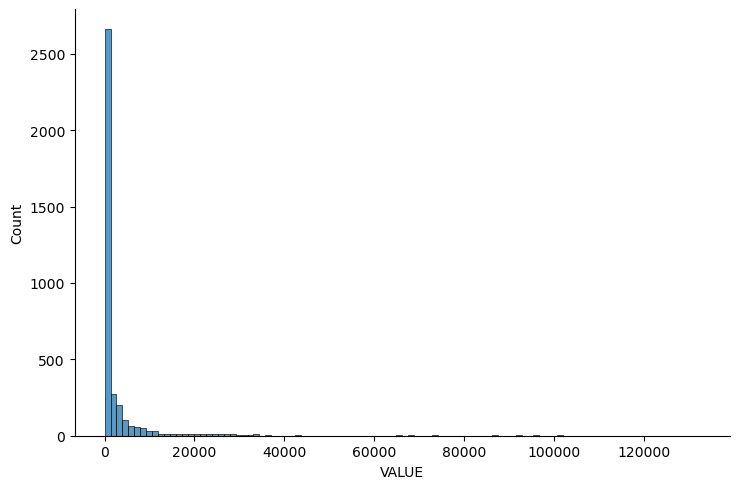

In [28]:
print("Histogram for training dataset")
dfa_Target_To_Analysis.print_histogram(0)

print("Histgram for testing dataset")
dfa_Target_To_Analysis.print_histogram(1)

All of the Panda datasets Analysis<br />
All of these data are analysis by chi-square test.<br />
The data I want to analysis this point are all categorical.<br />
Two columns that are used are "REF_DATE" which is used to split are "GEO" and "Characteristics".

In [29]:
# https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
# https://www.geeksforgeeks.org/contingency-table-in-python/
# https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
# https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/


# from scipy.stats import chi2_contingency

class ChiSquareAnalysisByYear:

    def __init__(self, df, classify, pd, np):

        self.data_crosstab = pd.crosstab(df[classify], 
                            df['REF_DATE'], 
                               margins = False) 
        # print(self.data_crosstab) 

    def displayCrosstab(self):
        # Display/OUtput whole corsstab table
        print(self.data_crosstab)

    def returnCrosstab(self):
        # Return whole crosstab table itself
        return self.data_crosstab

    def doChiSquareAnalysis(self):

        # defining the table
        data = self.data_crosstab # [[207, 282, 241], [234, 242, 232]]
        stat, p, dof, expected = chi2_contingency(data)

        # interpret p-value
        alpha = 0.05
        print("p value is " + str(p))
        if p <= alpha:
            print('Dependent (reject H0)')
        else:
            print('Independent (H0 holds true)')

In [30]:
# Used by Chi-Square methods
# Used by spliting of training and testing dataset
# I did the analysis of training dataset anyway but only will be use testing dataset.
# Commented the analysis divided by year

df_analysis = [training_df_AvgAnnHrsWrk, testing_df_AvgAnnHrsWrk]

# First one is Training set. Second one is Testing set.
for x in df_analysis:
    data_crosstab_char = ChiSquareAnalysisByYear(x,'Characteristics', pd, np)
    data_crosstab_char.displayCrosstab()
    data_crosstab_char.doChiSquareAnalysis()

    data_crosstab_province = ChiSquareAnalysisByYear(x,'GEO', pd, np)
    data_crosstab_province.displayCrosstab()
    data_crosstab_province.doChiSquareAnalysis()

REF_DATE                           2013  2014  2015  2016  2017  2018
Characteristics                                                      
15 to 24 years                       64    64    64    64    64    64
25 to 34 years                       70    70    70    70    70    70
35 to 44 years                       70    70    70    70    70    70
45 to 54 years                       70    70    70    70    70    70
55 to 64 years                       70    70    70    70    70    70
65 years old and over                64    64    64    64    64    64
College diploma                      70    70    70    70    70    70
Female employees                     70    70    70    70    70    70
High school diploma and less         70    70    70    70    70    70
Immigrant employees                  66    66    66    66    66    66
Indigenous identity employees        66    66    66    66    66    66
Male employees                       70    70    70    70    70    70
Non-immigrant employ

In [31]:
# Used by Chi-Square methods

df_analysis = [training_df_AvgAnnHrsWrk, testing_df_AvgAnnHrsWrk]

# First one is Training set. Second one is Testing set.
for x in df_analysis:
    data_crosstab_char = ChiSquareAnalysisByYear(x,'Characteristics', pd, np)
    data_crosstab_char.displayCrosstab()
    data_crosstab_char.doChiSquareAnalysis()

    data_crosstab_province = ChiSquareAnalysisByYear(x,'GEO', pd, np)
    data_crosstab_province.displayCrosstab()
    data_crosstab_province.doChiSquareAnalysis()

REF_DATE                           2013  2014  2015  2016  2017  2018
Characteristics                                                      
15 to 24 years                       64    64    64    64    64    64
25 to 34 years                       70    70    70    70    70    70
35 to 44 years                       70    70    70    70    70    70
45 to 54 years                       70    70    70    70    70    70
55 to 64 years                       70    70    70    70    70    70
65 years old and over                64    64    64    64    64    64
College diploma                      70    70    70    70    70    70
Female employees                     70    70    70    70    70    70
High school diploma and less         70    70    70    70    70    70
Immigrant employees                  66    66    66    66    66    66
Indigenous identity employees        66    66    66    66    66    66
Male employees                       70    70    70    70    70    70
Non-immigrant employ

In [32]:
df_analysis = [training_df_AvgHrsWages, testing_df_AvgHrsWages]

# First one is Training set. Second one is Testing set.
for x in df_analysis:
    data_crosstab_char = ChiSquareAnalysisByYear(x,'Characteristics', pd, np)
    data_crosstab_char.displayCrosstab()
    data_crosstab_char.doChiSquareAnalysis()

    data_crosstab_province = ChiSquareAnalysisByYear(x,'GEO', pd, np)
    data_crosstab_province.displayCrosstab()
    data_crosstab_province.doChiSquareAnalysis()

REF_DATE                           2013  2014  2015  2016  2017  2018
Characteristics                                                      
15 to 24 years                       64    64    64    64    64    64
25 to 34 years                       70    70    70    70    70    70
35 to 44 years                       70    70    70    70    70    70
45 to 54 years                       70    70    70    70    70    70
55 to 64 years                       70    70    70    70    70    70
65 years old and over                64    64    64    64    64    64
College diploma                      70    70    70    70    70    70
Female employees                     70    70    70    70    70    70
High school diploma and less         70    70    70    70    70    70
Immigrant employees                  66    66    66    66    66    66
Indigenous identity employees        66    66    66    66    66    66
Male employees                       70    70    70    70    70    70
Non-immigrant employ

In [33]:
df_analysis = [training_df_AvgWeekHrsWrked, testing_df_AvgWeekHrsWrked]
 
# First one is Training set. Second one is Testing set.
for x in df_analysis:
    data_crosstab_char = ChiSquareAnalysisByYear(x,'Characteristics', pd, np)
    data_crosstab_char.displayCrosstab()
    data_crosstab_char.doChiSquareAnalysis()

    data_crosstab_province = ChiSquareAnalysisByYear(x,'GEO', pd, np)
    data_crosstab_province.displayCrosstab()
    data_crosstab_province.doChiSquareAnalysis()

REF_DATE                           2013  2014  2015  2016  2017  2018
Characteristics                                                      
15 to 24 years                       64    64    64    64    64    64
25 to 34 years                       70    70    70    70    70    70
35 to 44 years                       70    70    70    70    70    70
45 to 54 years                       70    70    70    70    70    70
55 to 64 years                       70    70    70    70    70    70
65 years old and over                64    64    64    64    64    64
College diploma                      70    70    70    70    70    70
Female employees                     70    70    70    70    70    70
High school diploma and less         70    70    70    70    70    70
Immigrant employees                  66    66    66    66    66    66
Indigenous identity employees        66    66    66    66    66    66
Male employees                       70    70    70    70    70    70
Non-immigrant employ

In [34]:
df_analysis = [training_df_Hrs_Wrked, testing_df_Hrs_Wrked]

# First one is Training set. Second one is Testing set.    
for x in df_analysis:
    data_crosstab_char = ChiSquareAnalysisByYear(x,'Characteristics', pd, np)
    data_crosstab_char.displayCrosstab()
    data_crosstab_char.doChiSquareAnalysis()

    data_crosstab_province = ChiSquareAnalysisByYear(x,'GEO', pd, np)
    data_crosstab_province.displayCrosstab()
    data_crosstab_province.doChiSquareAnalysis()

REF_DATE                           2013  2014  2015  2016  2017  2018
Characteristics                                                      
15 to 24 years                       64    64    64    64    64    64
25 to 34 years                       70    70    70    70    70    70
35 to 44 years                       70    70    70    70    70    70
45 to 54 years                       70    70    70    70    70    70
55 to 64 years                       70    70    70    70    70    70
65 years old and over                64    64    64    64    64    64
College diploma                      70    70    70    70    70    70
Female employees                     70    70    70    70    70    70
High school diploma and less         70    70    70    70    70    70
Immigrant employees                  66    66    66    66    66    66
Indigenous identity employees        66    66    66    66    66    66
Male employees                       70    70    70    70    70    70
Non-immigrant employ

REF_DATE                   2013  2014  2015  2016  2017  2018
GEO                                                          
Alberta                      90    90    90    90    90    90
British Columbia             90    90    90    90    90    90
Canada                       90    90    90    90    90    90
Manitoba                     90    90    90    90    90    90
New Brunswick                90    90    90    90    90    90
Newfoundland and Labrador    86    86    86    86    86    86
Northwest Territories        86    86    86    86    86    86
Nova Scotia                  90    90    90    90    90    90
Nunavut                      78    78    78    78    78    78
Ontario                      90    90    90    90    90    90
Prince Edward Island         86    86    86    86    86    86
Quebec                       90    90    90    90    90    90
Saskatchewan                 90    90    90    90    90    90
Yukon                        78    78    78    78    78    78
p value 

In [35]:
df_analysis = [training_df_NumOfJob, testing_df_NumOfJob]

# First one is Training set. Second one is Testing set. 
for x in df_analysis:
    data_crosstab_char = ChiSquareAnalysisByYear(x,'Characteristics', pd, np)
    data_crosstab_char.displayCrosstab()
    data_crosstab_char.doChiSquareAnalysis()

    data_crosstab_province = ChiSquareAnalysisByYear(x,'GEO', pd, np)
    data_crosstab_province.displayCrosstab()
    data_crosstab_province.doChiSquareAnalysis()

REF_DATE                           2013  2014  2015  2016  2017  2018
Characteristics                                                      
15 to 24 years                       64    64    64    64    64    64
25 to 34 years                       70    70    70    70    70    70
35 to 44 years                       70    70    70    70    70    70
45 to 54 years                       70    70    70    70    70    70
55 to 64 years                       70    70    70    70    70    70
65 years old and over                64    64    64    64    64    64
College diploma                      70    70    70    70    70    70
Female employees                     70    70    70    70    70    70
High school diploma and less         70    70    70    70    70    70
Immigrant employees                  66    66    66    66    66    66
Indigenous identity employees        66    66    66    66    66    66
Male employees                       70    70    70    70    70    70
Non-immigrant employ

REF_DATE                   2013  2014  2015  2016  2017  2018
GEO                                                          
Alberta                      90    90    90    90    90    90
British Columbia             90    90    90    90    90    90
Canada                       90    90    90    90    90    90
Manitoba                     90    90    90    90    90    90
New Brunswick                90    90    90    90    90    90
Newfoundland and Labrador    86    86    86    86    86    86
Northwest Territories        86    86    86    86    86    86
Nova Scotia                  90    90    90    90    90    90
Nunavut                      78    78    78    78    78    78
Ontario                      90    90    90    90    90    90
Prince Edward Island         86    86    86    86    86    86
Quebec                       90    90    90    90    90    90
Saskatchewan                 90    90    90    90    90    90
Yukon                        78    78    78    78    78    78
p value 

In [36]:
df_analysis = [training_df_WagesAndSalaries, testing_df_WagesAndSalaries]

# First one is Training set. Second one is Testing set.    
for x in df_analysis:
    data_crosstab_char = ChiSquareAnalysisByYear(x,'Characteristics', pd, np)
    data_crosstab_char.displayCrosstab()
    data_crosstab_char.doChiSquareAnalysis()

    data_crosstab_province = ChiSquareAnalysisByYear(x,'GEO', pd, np)
    data_crosstab_province.displayCrosstab()
    data_crosstab_province.doChiSquareAnalysis()

REF_DATE                           2013  2014  2015  2016  2017  2018
Characteristics                                                      
15 to 24 years                       64    64    64    64    64    64
25 to 34 years                       70    70    70    70    70    70
35 to 44 years                       70    70    70    70    70    70
45 to 54 years                       70    70    70    70    70    70
55 to 64 years                       70    70    70    70    70    70
65 years old and over                64    64    64    64    64    64
College diploma                      70    70    70    70    70    70
Female employees                     70    70    70    70    70    70
High school diploma and less         70    70    70    70    70    70
Immigrant employees                  66    66    66    66    66    66
Indigenous identity employees        66    66    66    66    66    66
Male employees                       70    70    70    70    70    70
Non-immigrant employ

REF_DATE                   2013  2014  2015  2016  2017  2018
GEO                                                          
Alberta                      90    90    90    90    90    90
British Columbia             90    90    90    90    90    90
Canada                       90    90    90    90    90    90
Manitoba                     90    90    90    90    90    90
New Brunswick                90    90    90    90    90    90
Newfoundland and Labrador    86    86    86    86    86    86
Northwest Territories        86    86    86    86    86    86
Nova Scotia                  90    90    90    90    90    90
Nunavut                      78    78    78    78    78    78
Ontario                      90    90    90    90    90    90
Prince Edward Island         86    86    86    86    86    86
Quebec                       90    90    90    90    90    90
Saskatchewan                 90    90    90    90    90    90
Yukon                        78    78    78    78    78    78
p value 